<a href="https://colab.research.google.com/github/NooraAlsaiari077/DataMiningProject/blob/main/Phase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1495727298.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')



                              1. DATA CLASSIFICATION:

Shapes:
X: (770, 25)
y: (770,)

Split: Train=50% | Test=50% 

--- Training Decision Tree (GINI) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 64   0]
 [  0 321]]


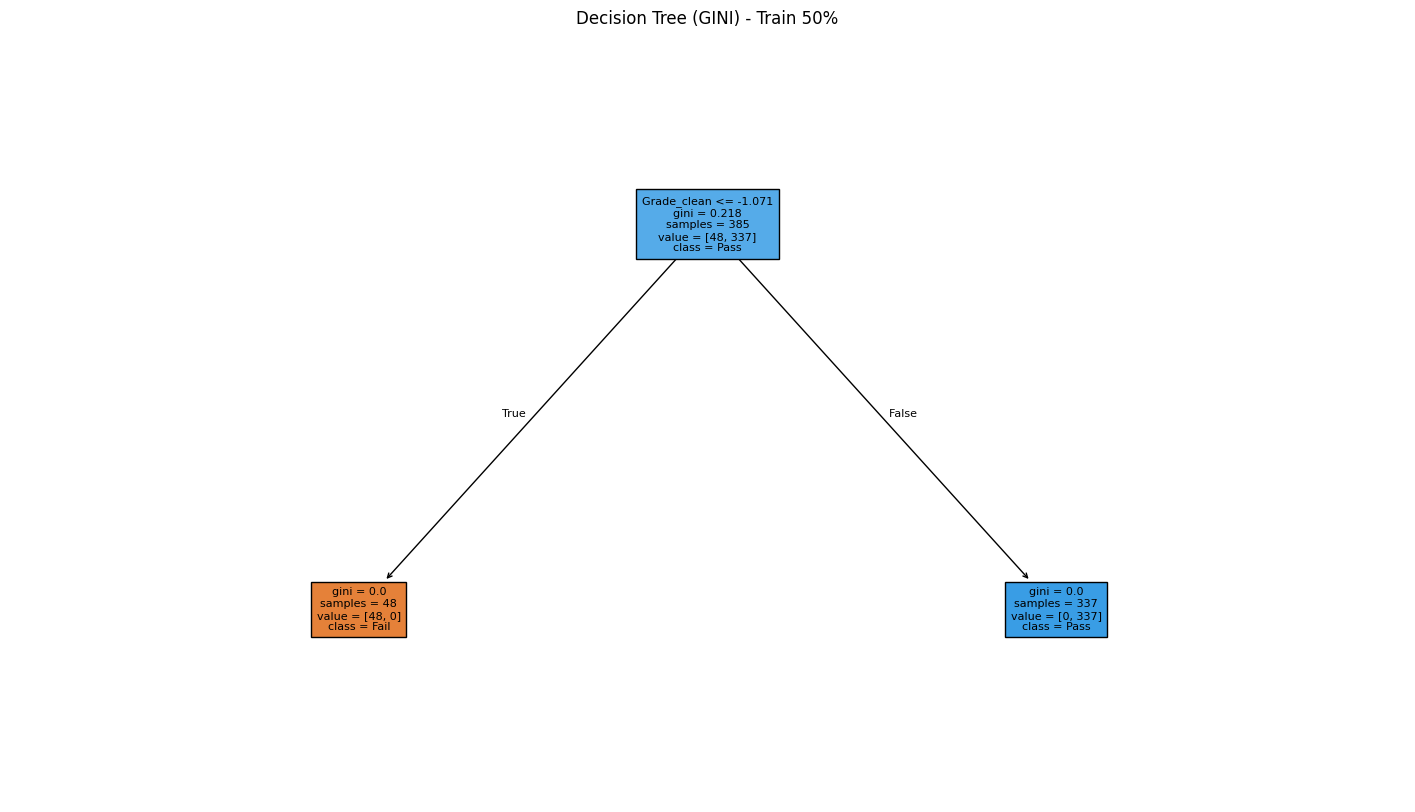


--- Training Decision Tree (ENTROPY) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 64   0]
 [  0 321]]


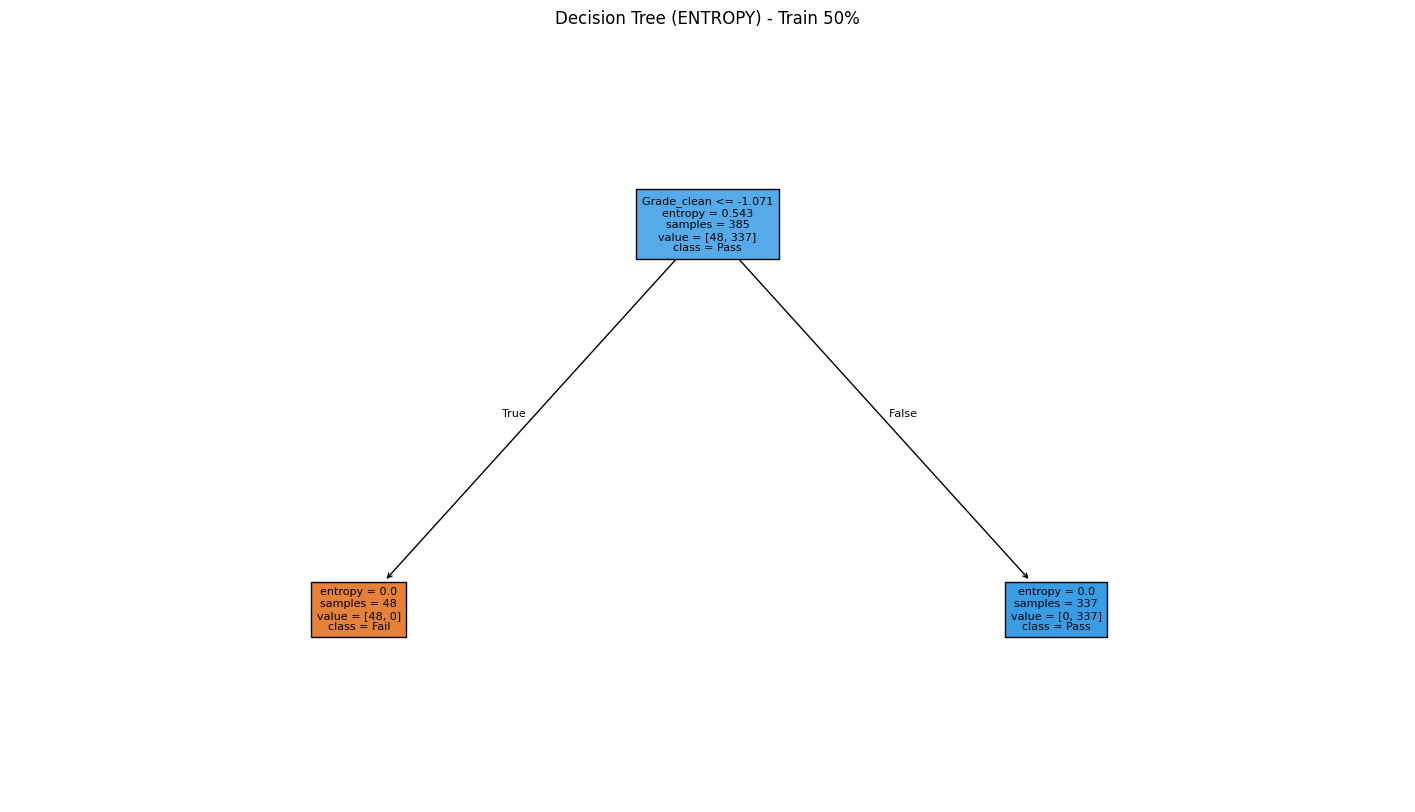


Split: Train=60% | Test=40% 

--- Training Decision Tree (GINI) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 54   0]
 [  0 254]]


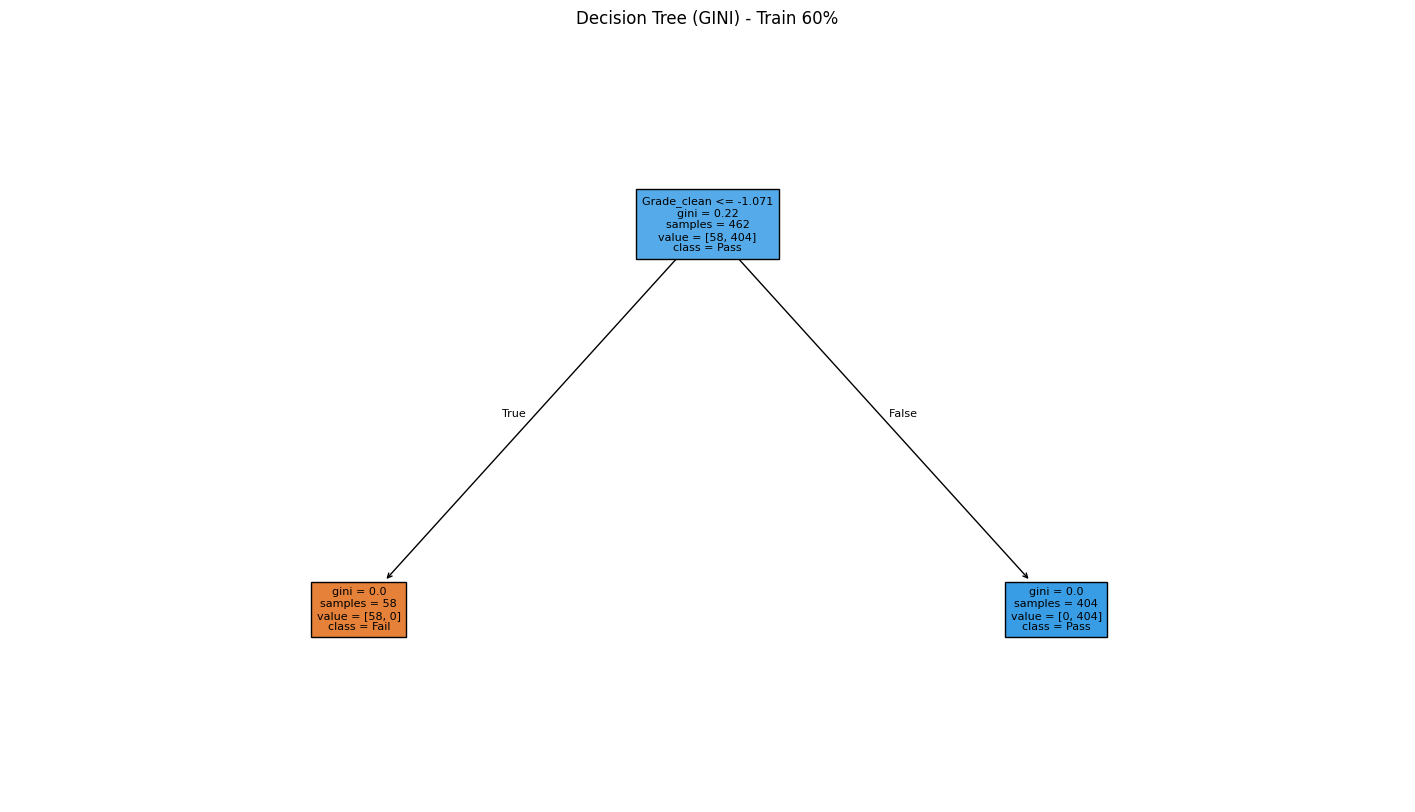


--- Training Decision Tree (ENTROPY) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 54   0]
 [  0 254]]


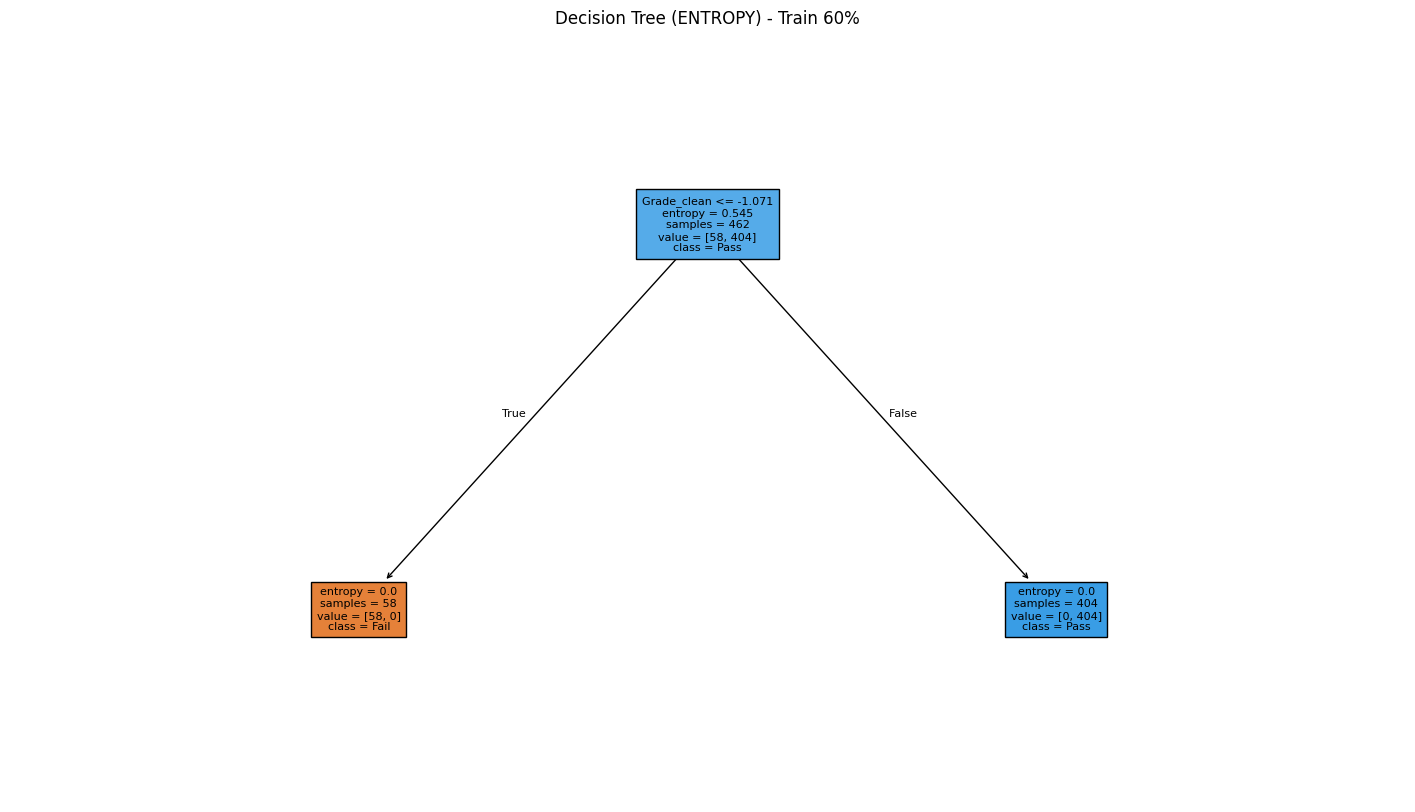


Split: Train=80% | Test=20% 

--- Training Decision Tree (GINI) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 25   0]
 [  0 129]]


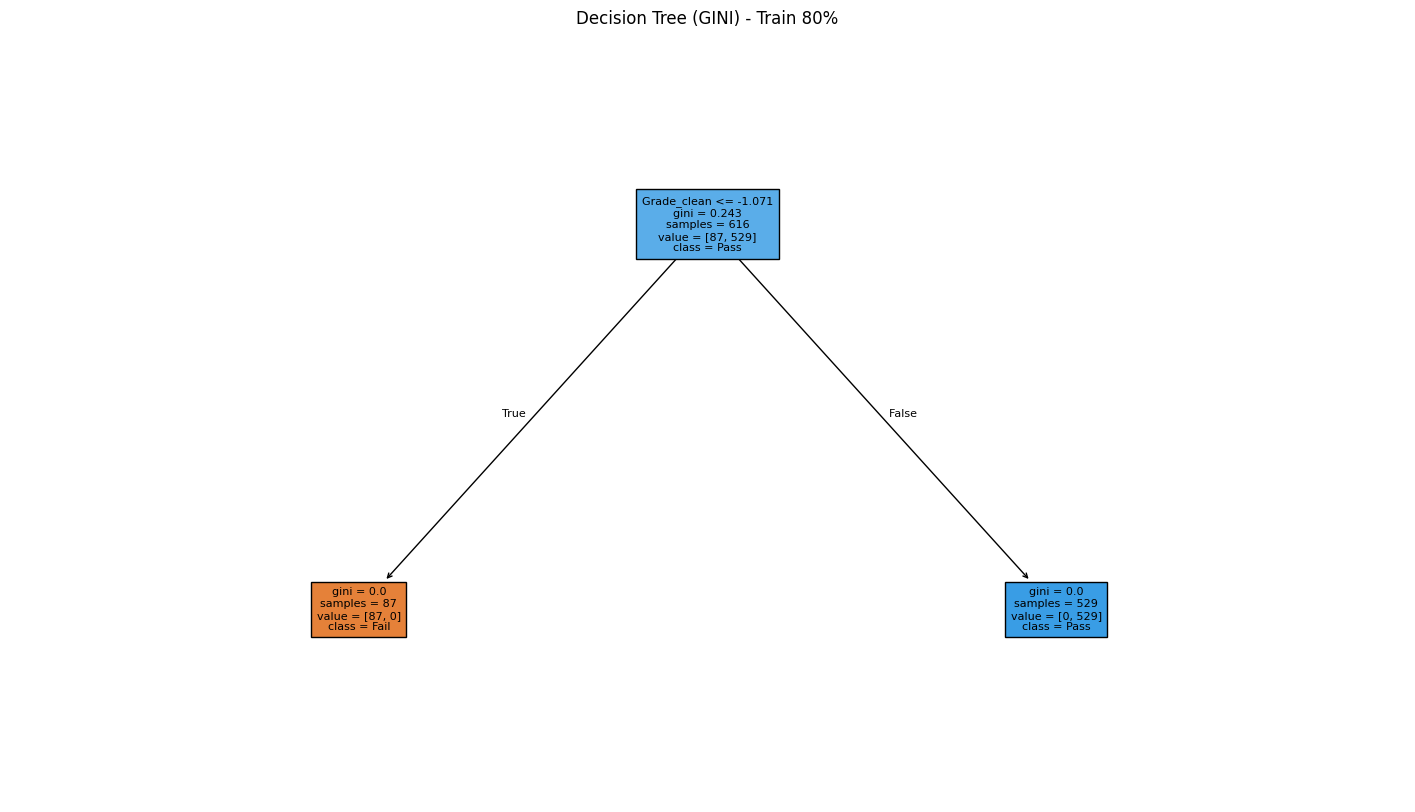


--- Training Decision Tree (ENTROPY) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 25   0]
 [  0 129]]


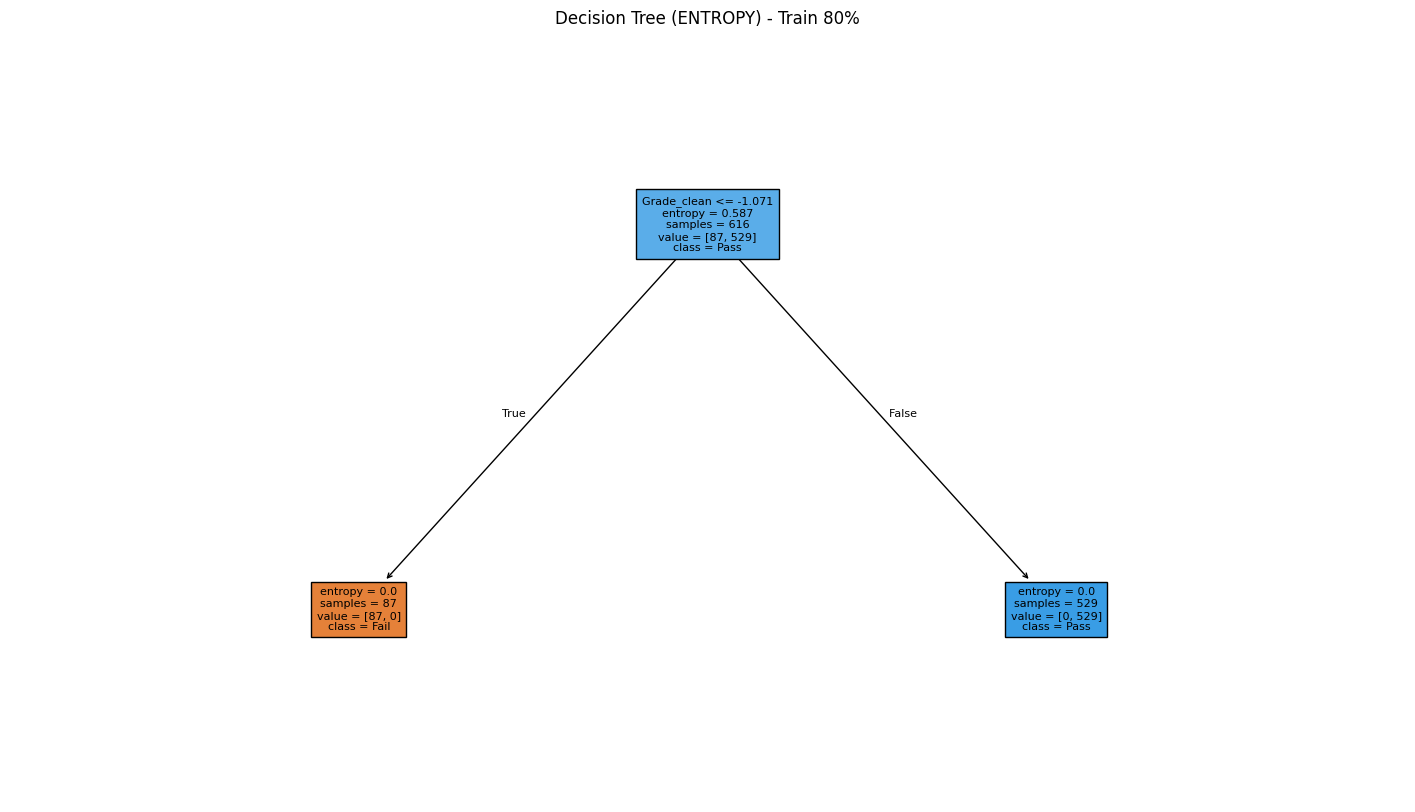



==================== FINAL RESULTS SUMMARY ====================
   Split Criterion  Accuracy
0  50/50      gini       1.0
1  50/50   entropy       1.0
2  60/40      gini       1.0
3  60/40   entropy       1.0
4  80/20      gini       1.0
5  80/20   entropy       1.0


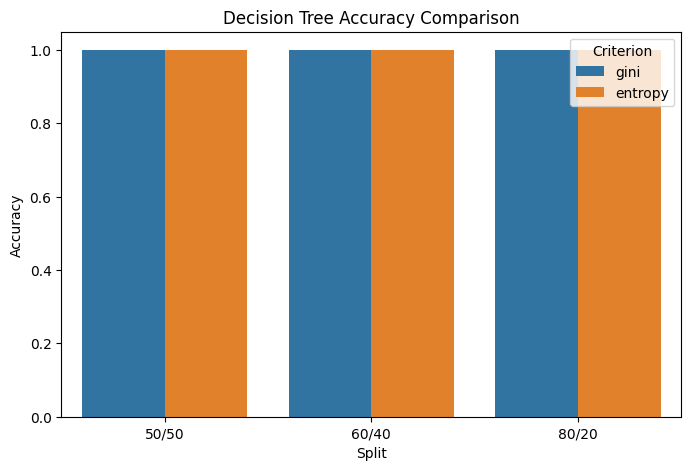

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

url = "https://raw.githubusercontent.com/NooraAlsaiari077/DataMiningProject/refs/heads/main/Dataset/Preprocessed_dataset%20(1).csv"

df = pd.read_csv(url)

# we fixed data values and type
df = df.replace({'%': ''}, regex=True)
df = df.replace({',': ''}, regex=True)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


print("\n" + "====================================================================================")
print("                              1. DATA CLASSIFICATION:")
print("====================================================================================")
# ---------------------------------------------------------------------------------------------------------------------------------
# 1. PREPARE FEATURES (X) AND TARGET (y)

y = df["Pass_Fail_Encoded"]
# Removing non-feature columns
X = df.drop(columns=["Pass_Fail", "Pass_Fail_Encoded", "Grade"])
print("\nShapes:")
print("X:", X.shape)
print("y:", y.shape)

# ----------------------------------------------------------------------------------------------------------------------------------
# 2. TRAIN DECISION TREES FOR 3 TRAIN/TEST SPLITS USING GINI + ENTROPY

splits = [(0.5, 0.5), (0.6, 0.4), (0.8, 0.2)]
results = []

#looping through training set
for train_size, test_size in splits:

    print(f"\nSplit: Train={train_size*100:.0f}% | Test={test_size*100:.0f}% ")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, test_size=test_size, random_state=42
    )

    for criterion in ["gini", "entropy"]:

        print(f"\n--- Training Decision Tree ({criterion.upper()}) ---")

        model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results.append([f"{train_size*100:.0f}/{test_size*100:.0f}", criterion, acc])

        print(f"Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(cm)

        # The Tree
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            filled=True,
            feature_names=X.columns,
            class_names=["Fail", "Pass"],
            fontsize=8
        )
        plt.title(f"Decision Tree ({criterion.upper()}) - Train {train_size*100:.0f}%")
        plt.show()

# --------------------------------------------------------------------------------------------------------------
# 3. RESULTS SUMMARY


results_df = pd.DataFrame(results, columns=["Split", "Criterion", "Accuracy"])
print("\n\n==================== FINAL RESULTS SUMMARY ====================")
print(results_df)
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Split", y="Accuracy", hue="Criterion")
plt.title("Decision Tree Accuracy Comparison")
plt.show()




#The classification label Pass_Fail was generated directly from the cleaned grade using the rule: Pass_Fail = (Grade_clean >= 60)
#Since Grade_clean itself was included among the input features used for training (in X = df.drop(columns=["Pass_Fail", "Pass_Fail_Encoded", "Grade"])),
# the model simply learned the exact logical rule: if Grade_clean >= 60 → Pass  else → Fail
#Also the dataset contains no noise or contradictions, so the decision tree makes zero mistakes on all splits and for both criteria.
#For this reason, all models produce 100% accuracy.



